In [1]:
#Standard python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

# Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
scaler = StandardScaler()
from sklearn import metrics

# # Models & Utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

# NLP Libraries
import nltk
nltk.download('punkt')
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
np.random.seed(0)
import re
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Added
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Johnny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Johnny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('data/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Taking a look at our columns
print(df.info())

# Checking for NA data
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


In [4]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


### remove duplicates?

### change pos to 1 and neg to 0

## Add features

In [6]:
run = False

if run == True:

    ## Indirect features
    eng_stopwords = set(stopwords.words("english"))

    df['count_sent']=df["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)
    #Word count in each comment:
    df['count_word']=df["review"].apply(lambda x: len(str(x).split()))
    #Unique word count
    df['count_unique_word']=df["review"].apply(lambda x: len(set(str(x).split())))
    #Letter count
    df['count_letters']=df["review"].apply(lambda x: len(str(x)))
    #punctuation count
    df["count_punctuations"] =df["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    #upper case words count
    df["count_words_upper"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
    #title case words count
    df["count_words_title"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    #Number of stopwords
    df["count_stopwords"] = df["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
    #Average length of the words
    df["mean_word_len"] = df["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    #Word count percent in each comment:
    df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
    #Punct percent in each comment:
    df['punct_percent']=df['count_punctuations']*100/df['count_word']
    #derived features
    #Word count percent in each comment:
    df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
    #derived features
    #Punct percent in each comment:
    df['punct_percent']=df['count_punctuations']*100/df['count_word']
    
    df.to_json('data/df_json_store.json')
    
else:
     df = pd.read_json('data/df_json_store.json')
        
df.head(2)

,review,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,One of the other reviewers has mentioned that ...,positive,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166
1,A wonderful little production. <br /><br />The...,positive,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494


### 25 most common words in positive and negative reviews

In [7]:

# ax = neg_freq_df.set_index('Word').sort_values('Frequency').plot(kind='barh')
# ax.set(title="25 Most Common Words in Negative Tweets")

### Word clouds pos / neg

### visualize TSNE

### mean word length postive or negative?.  bucket and histogram?

### Same with word unique percentage

Sentiment across word count

Word count histogram



In [8]:
df

,review,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,One of the other reviewers has mentioned that ...,positive,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166
1,A wonderful little production. <br /><br />The...,positive,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494
2,I thought this was a wonderful way to spend ti...,positive,1,166,121,926,40,3,20,76,4.584337,72.891566,24.096386
3,Basically there's a family where a little boy ...,negative,1,138,96,748,42,3,13,62,4.427536,69.565217,30.434783
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,230,152,1317,56,1,31,96,4.730435,66.086957,24.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1,194,127,1008,46,3,7,102,4.201031,65.463918,23.711340
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,1,112,85,642,26,3,15,51,4.741071,75.892857,23.214286
49997,I am a Catholic taught in parochial elementary...,negative,1,230,148,1280,45,5,21,111,4.569565,64.347826,19.565217
49998,I'm going to have to disagree with the previou...,negative,1,212,154,1234,28,0,20,96,4.825472,72.641509,13.207547


# Text Preprocessing

## Remove

In [9]:
first_review = df['review'][0][0:500]
first_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ"

In [10]:
## From tjhe lessons
from nltk import regexp_tokenize
pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
regexp_tokenize(first_review,pattern)

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'Oz',
 'episode',
 "you'll",
 'be',
 'hooked',
 'They',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'br',
 'br',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 'Trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'Its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'br',
 'br',
 'It',
 'is',
 'called',
 'OZ']

In [11]:
stopwords_list = stopwords.words('english')

stopwords_list.append('br')

In [12]:
tokens = regexp_tokenize(first_review, pattern)

tokens

bad_tags = ['br']

cleaned_tokens = []

for token in tokens:
    if token not in bad_tags:
        cleaned_tokens.append(token)
        
cleaned_tokens[0:5]
    

['One', 'of', 'the', 'other', 'reviewers']

In [13]:
def my_tokenizer(first_review):
        pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
        
        tokens = regexp_tokenize(first_review, pattern)

#         bad_tags = ['br']

        cleaned_tokens = []

        for token in tokens:
            token = token.lower()
            if token not in stopwords_list:

                cleaned_tokens.append(token)

        return cleaned_tokens
    
# cleaned_tokens = my_tokenizer("fFDASsla;f8989jfdklsa;j")
# " ".join(cleaned_tokens)
    


In [14]:
# df['reviews_t'] = df['review'].apply(lambda text: my_tokenizer(text))

# df['reviews_t']


In [15]:
# ## set up text preprocessing pipeline

# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(strip_accents='unicode',
#                               tokenizer=my_tokenizer,

#                              stop_words=stopwords_list)

# x = df['review']
# y = df['sentiment']

# # Do train test split here

# x_vector = vectorizer.fit_transform(x)

# # Fit both x train and test


# Modeling

In [18]:
# df['reviews_p'] = df['reviews_t']

# X_train, X_test, y_train, y_test = train_test_split(df['reviews_p'], df['sentiment'], test_size=0.3,random_state=0)

In [26]:
## set up text preprocessing pipeline

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='unicode',
                              tokenizer=my_tokenizer,

#                              stop_words=stopwords_list
                            )

X = df['review']
y = df['sentiment']

X

# Do train test split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Fit both x train and test
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)




In [27]:
# Logistic Regression with Count Vectoriser
classifier1 = LogisticRegression(penalty='l2',C=10)
classifier1.fit(X_train_cv, y_train)

LogisticRegression(C=10)

In [29]:
def evaluate_model(model, X_train=X_train, X_test=X_test, y_train=y_train, 
                   y_test=y_test, cmap='Greens', normalize='true',
                   classes=None,figsize=(10,4)):
    
    # Print model accuracy
    print(f'Training Accuracy: {model.score(X_train,y_train):.2%}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.2%}')
    print('')
    
    # Print classification report
    y_test_predict = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_predict,
                                        target_names=classes))
    
    # Plot confusion matrix
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                  ax=ax[0])
    
    #Plot ROC curves
    with sns.axes_style("darkgrid"):
        curve = metrics.plot_roc_curve(model,X_train,y_train,ax=ax[1])
        curve2 = metrics.plot_roc_curve(model,X_test,y_test,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1],ls=':')
        fig.tight_layout()
        plt.show()

Training Accuracy: 99.99%
Test Accuracy: 87.41%

              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      7540
    positive       0.87      0.88      0.87      7460

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



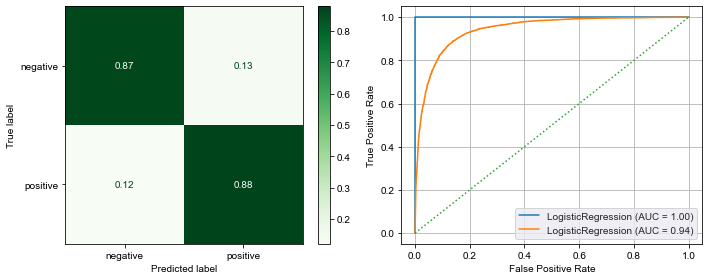

In [36]:
evaluate_model(classifier1, X_train=X_train_cv, X_test=X_test_cv)

# Word analysis

## Frequency Distribution

## Normalized word frequency

## Bigrams

## Mutual information scores



### TF-IDF vectorization
#### Visualize Vector


### bag of words

## Models

# Scratch

In [ ]:
#Standard python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

# Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
scaler = StandardScaler()
from sklearn import metrics

# Models & Utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Warnings
import warnings
warnings.filterwarnings(action='ignore')

### HTML code

In [ ]:
first_review = df['review'][0][0:500]

first_review

In [ ]:
def remove_html_tags(text):
    
    # Define pattern for re
    html_tag_pattern = re.compile('<.*?>')
    
    # Remove HTML tags from text and return result
    return html_tag_pattern.sub(r'', text)

remove_html_tags(first_review)

In [ ]:
df['review'] = df['review'].apply(remove_html_tags)

In [ ]:
pd.set_option('display.max_colwidth', None)

print(df['review'][0][0:500])


### Contractions

In [ ]:
# import contractions

# def expand_contractions(text):
#     """expand shortened words, e.g. don't to do not"""
#     text = contractions.fix(text)
#     return text

# expand_contractions(df['review'][0][0:500])

# cont = Contractions(api_key="glove-twitter-25")

# list(cont.expand_texts([first_review]))

# contractions.fix("you're happy now")

In [ ]:
# Removing all punctuations from Text
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

def clean_contractions(text, mapping=mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

clean_contractions(df['review'][0][0:500],mapping)

# df['review1'] = df['review'].apply(lambda x: clean_contractions(x['review'], Xmapping), axis=1)
df['review'] = df['review'].apply(clean_contractions)

df['review'][0][0:500]

### Alpha numeric words

In [ ]:
df['review'][0][0:500]

In [ ]:
def remove_alpha_numeric(text):
    
    # Strip alphanumeric words from reviews
    text = re.sub("\S*\d\S*", "", text).strip()
    
    # Return result
    return text

remove_alpha_numeric(df['review'][0][0:500])

In [ ]:
df['review'] = df['review'].apply(remove_alpha_numeric)

### punctuation

In [ ]:

def remove_punctuation(text, punctuation_list = list(string.punctuation)):
    for symbol in punctuation_list:
        if symbol in text:
            text = text.replace(symbol, ' ')
    return text.strip()

remove_punctuation(df['review'][0][0:500])

In [ ]:
df['review'] = df['review'].apply(remove_punctuation)

In [ ]:
df['review'][0][0:500]

### Lower case

In [ ]:
df ['review'] = df['review'].str.lower()

df['review'][0][0:500]

### stop words

In [ ]:
stopwords.words('english')

## Process

### Stemming

### Lemmatization